<a href="https://colab.research.google.com/github/Satendrakumar93/Retail_Sales_Predication/blob/main/RRetail_Sales_Predication_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Project Type** - EDA/Regression/Classification/Unsupervised

 

 

# **Project Summary-**



This dataset is a live dataset of Rossmann Store. On analysing this problem we observe that Rossmann problem is a regression problem and our primarily goal is to pridict the sales figures of Rossmann problem. In this Notebook we work on follwing topics

Analysing the Dataset by using Exploratory Data Analysis. Using Exponential Moving Averages analyse Trends and Seasonality in Roseman datset. Analyse Regression analysis using following prediction analysis, A.Linear Regression Analysis B. Elastic Regression (Lasso and Ridge Regression),C. Random Forest and Xgboost.

By applying above algorithim we find accuracy of 98% by Xgboost.

#**Problem Statement**

**Write Problem Statement Here**

Rossmann operations over 3,000 drug stores in 7 European countries.Currently,Rossmann store managers are tasked with predicting their dailysales for up to six weeks in advance.Store sales are influenced by many factors, including promotions, competition,school and state holidays,
seasonality, and locality. With thoisands of individual managers predicting sales on their unuque circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the datset were temporarily clsed for refurbishment. Data Description Rossmann Stores Data.csv-historical data icluding Sales store.csv-supplementalimformation about the stores Data fields Most of the fields are self-explanatory. id-an id that representations a (Store.Da te) duple within the set Store- a unique id for each store Sales-the turnover for any given day (Dependent Variable)Customeers- the number of customers on a given by


## **GitHub-Link**

https://github.com/Satendrakumar93

**Data Description**



<b>Id</b> - an id that represents a (Store.Data)duple within the test set

<b>Store</B>-a unique id for each store

<B>Sales</b>- the turnover for any given day (this is what you are predicting)

<b>Customers</b>- the number of customers on a given day

<b>Open</b>-an indicator for whether the store was open:0 = closed, 1 = open

<b>Stateholiday</b> - indicates a stete holiday.Normally all stores,with few exceptions,are closed on state holidays.Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = chrismas, 0 = None

<b>SchoolHoliday</b> - indictes if the (Store, Data) wast affected by the closure of public schools

<b>StoreType</b> - differentiates between 4 different store models: a,b,c,d,

<b>Assortment</b> - describes an assortment level: a = basic, b = extra, c = extended

<b>CompetitionDistance</b> - distance in meters to the nearest competitor store

*CompetitionOpenSince[Month/Year]* - gives the approximate year and month of the time the nearest competitor was poened

<b>Promo</b> - indicates whether a store is running a promo on that day

<b>Promo2</b> - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating 

<b>Promo2Since[Year/Week] - describes the year and calender week when the store stared participating in promo2

<b>PromoInterval</b> - describes the consecutive intervals Promo2 is started naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May,August,November of any given year for that store

<b>Rossmann Stores Data.csv</b> - historical data including Sales

<b>store.csv </b>- supplemental information about the store

Data fields Most of the fields are self-explanatory. The following are descriptions for those that aren't









#**Let's Being !**

#***1. Know Your Data***

<b>Import Libraries</b>

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns 
import plotly.express as px
import pandas as pd 
import ast
import math 
import random
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xbg
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pickle



Dataset Loading

In [5]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Rosmann Data 
database = "/content/drive/MyDrive/ Rossmann Stores Data.csv"
sales_df = pd.read_csv(database)

# Store data 
database = "/content/drive/MyDrive/Copy of store.csv"
store_df = pd.read_csv(database)

<ipython-input-6-27990a3af906>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_df = pd.read_csv(database)


In [7]:
sales_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [8]:
sales_df.shape

(1017209, 9)

In [9]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [11]:
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [12]:
# change state holiday value a,b,c is equal to 1 
sales_df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [13]:
# change datatype object into date format
sales_df['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

In [14]:
sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [15]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#**Data Wrangling**

<b> Missing Values/Null Values</b>

In [16]:
# CompetitionDistance - distance in meters to the nearest competitor store

sales_df['SchoolHoliday'].unique()

array([1, 0])

In [17]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [18]:
li = ["DayOfWeek" , "StateHoliday" , "SchoolHoliday"]

for i in li :
  print(i)
  print(sales_df[i].unique())
  print("----------------------")

DayOfWeek
[5 4 3 2 1 7 6]
----------------------
StateHoliday
['0' 'a' 'b' 'c' 0]
----------------------
SchoolHoliday
[1 0]
----------------------


In [19]:
store_df.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [20]:
# STORE DATASET FILL INTO NULL VALUES I . E O
store_df['CompetitionDistance'] = store_df['CompetitionDistance'].fillna(0)
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(0)
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(0)
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(0)
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(0)
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(0)
store_df['PromoInterval'] = store_df['PromoInterval'].fillna(0)

In [21]:
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [22]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [23]:
finall = pd.merge(sales_df, store_df, on = 'Store', how = 'left')

In [24]:
finall

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [25]:
# change data types object to int 
finall.loc[finall['StateHoliday'] == '0', 'StateHoliday'] = 0
finall.loc[finall['StateHoliday'] == 'a', 'StateHoliday'] = 1
finall.loc[finall['StateHoliday'] == 'b', 'StateHoliday'] = 2
finall.loc[finall['StateHoliday'] == 'c', 'StateHoliday'] = 3
#store the value with same column name I.E StateHoliday with function astype
finall['StateHoliday'] = finall['StateHoliday'].astype(int, copy = False)


In [26]:
#change Data Types object into int
finall.loc[finall['Assortment'] == 'a', 'Assortment'] = 0
finall.loc[finall['Assortment'] == 'b', 'Assortment'] = 1
finall.loc[finall['Assortment'] == 'c', 'Assortment'] = 2
#store the value with same column name i.e Assortment with function astype
finall['Assortment'] == finall ['Assortment'].astype(int, copy = False)

0          True
1          True
2          True
3          True
4          True
           ... 
1017204    True
1017205    True
1017206    True
1017207    True
1017208    True
Name: Assortment, Length: 1017209, dtype: bool

In [27]:
#change Data Type object into int 
finall.loc[finall['StoreType'] == 'a', 'StoreType'] = 0
finall.loc[finall['StoreType'] == 'b', 'StoreType'] = 1
finall.loc[finall['StoreType'] == 'c', 'StoreType'] = 2
finall.loc[finall['StoreType'] == 'd', 'StoreType'] = 3
#store the value with same column name i.e StoreType with function astype
finall['StoreType'] == finall ['StoreType'].astype(int, copy = False)

0          True
1          True
2          True
3          True
4          True
           ... 
1017204    True
1017205    True
1017206    True
1017207    True
1017208    True
Name: StoreType, Length: 1017209, dtype: bool

In [28]:
print(finall[['StateHoliday', 'Assortment', 'StoreType' ]].nunique())

StateHoliday    4
Assortment      3
StoreType       4
dtype: int64


In [29]:
finall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int64  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [30]:
finall["Sales"].value_counts()

0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: Sales, Length: 21734, dtype: int64

In [31]:
# code for changing format fo data from object to datetime
finall['Date'] = pd.to_datetime(finall['Date'], format = '%Y-%m-%d')

In [32]:
# code for change object into date format
finall['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(finall ['Date']).month

In [33]:
# code for change float into integer
finall['CompetitionOpenSinceYear'] = finall['CompetitionOpenSinceYear'].astype(int)
finall['Promo2SinceYear'] = finall['Promo2SinceYear'].astype(int)

In [34]:
finall['CompetitionDistance'] = finall['CompetitionDistance'].astype(int)
finall['Promo2SinceWeek'] = finall['Promo2SinceWeek'].astype(int)

In [35]:
finall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

<b> Understanding Our Variables</b>

In [36]:
finall.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0


In [37]:
finall.describe().apply(lambda x: round(x,2)) 

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.0,1017209.00,1017209.00
mean,558.43,4.0,5773.82,633.15,0.83,0.38,0.05,0.18,5415.98,5.85,1370.17,0.5,11.65,1007.01
std,321.91,2.0,3849.93,464.41,0.38,0.49,0.28,0.38,7710.25,3.33,935.36,0.5,15.32,1005.88
min,1.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0,0.00,0.00
25%,280.00,2.0,3727.00,405.00,1.00,0.00,0.00,0.00,700.00,3.00,0.00,0.0,0.00,0.00
50%,558.00,4.0,5744.00,609.00,1.00,0.00,0.00,0.00,2320.00,6.00,2006.00,1.0,1.00,2009.00
75%,838.00,6.0,7856.00,837.00,1.00,1.00,0.00,0.00,6880.00,8.00,2011.00,1.0,22.00,2012.00
max,1115.00,7.0,41551.00,7388.00,1.00,1.00,3.00,1.00,75860.00,12.00,2015.00,1.0,50.00,2015.00


<b>Data Vizualization, Storetelling Experimenting with charts: Understand the relationships between variables</b>

Sales

#Line Chart

Text(0.5, 1.0, 'Plot between Sales and DayOfWeek')

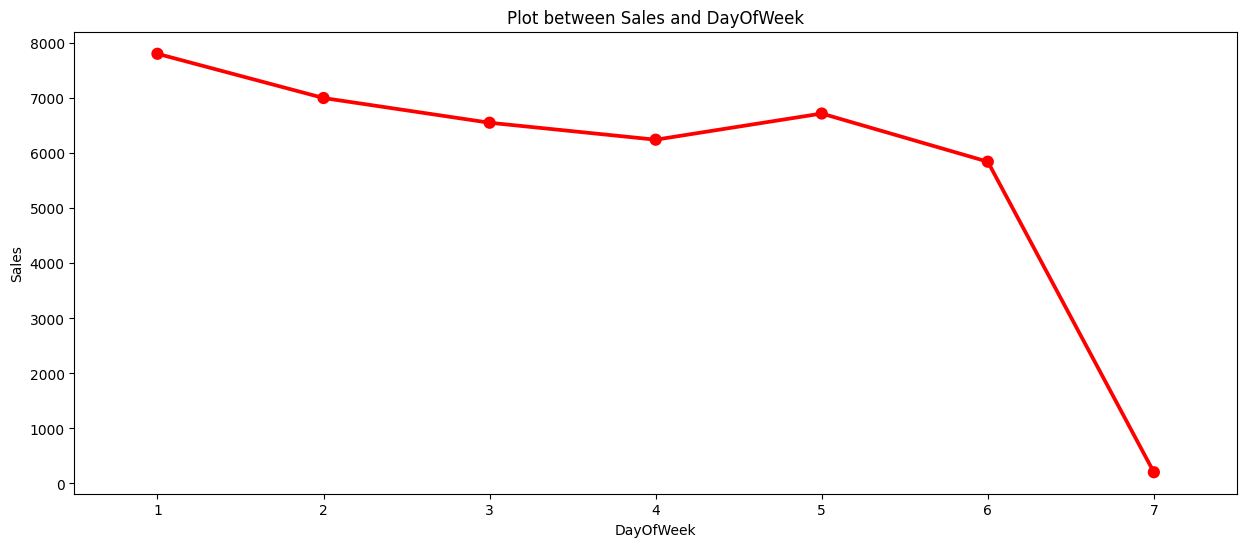

In [38]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'DayOfWeek', y = 'Sales', data=finall,color = 'red')
sns.set_style("dark")
plt.title('Plot between Sales and DayOfWeek')

From this graph we get insights that maximum Salse is on day 1 which is monday  and the same is decreasing till Day 6 which is Saturday. As most of the stores are closed on day 7 which is Sunday, so the Sales is the closed to Zero.

Text(0.5, 1.0, 'Plot between Sales and CompetitionOpenSinceMonth')

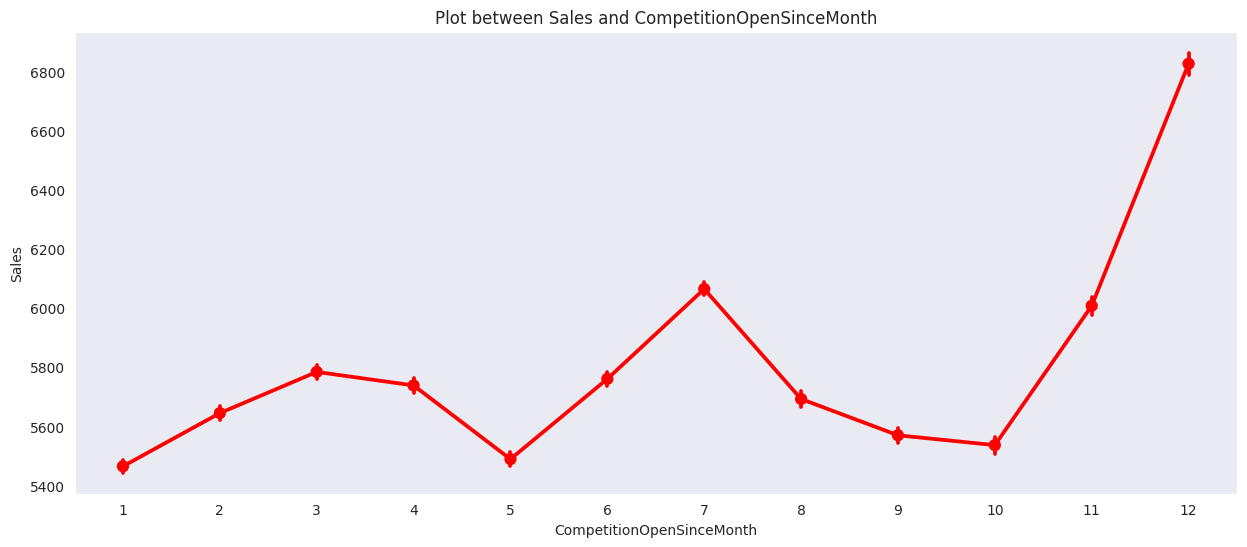

In [39]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y = 'Sales', data=finall,color = 'red')
sns.set_style("dark")
plt.title('Plot between Sales and CompetitionOpenSinceMonth')

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

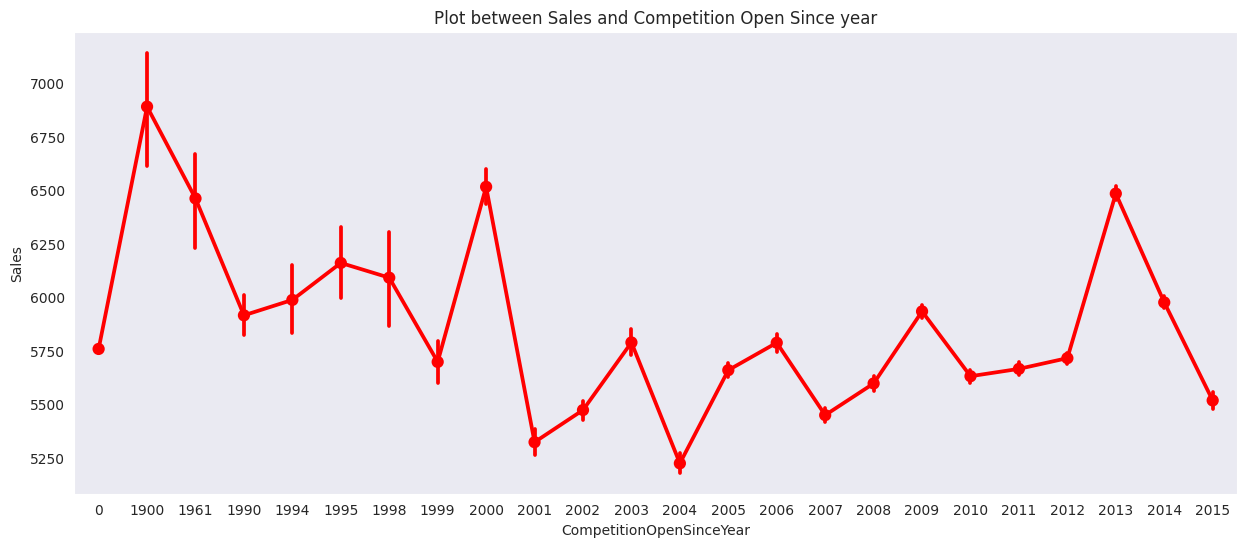

In [40]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y = 'Sales', data=finall,color = 'red')
sns.set_style("dark")
plt.title('Plot between Sales and Competition Open Since year')

From this chart we get insights that Sales in Highest During the Year 1900 because for that time there are limited number of stores,hence the competition is very low. but as year pass, no of stores get increased that means competition also increased acorrdingly, hence Sales got decline year by year.

Text(0.5, 1.0, 'Plot between Sales and Promo2SinceYear')

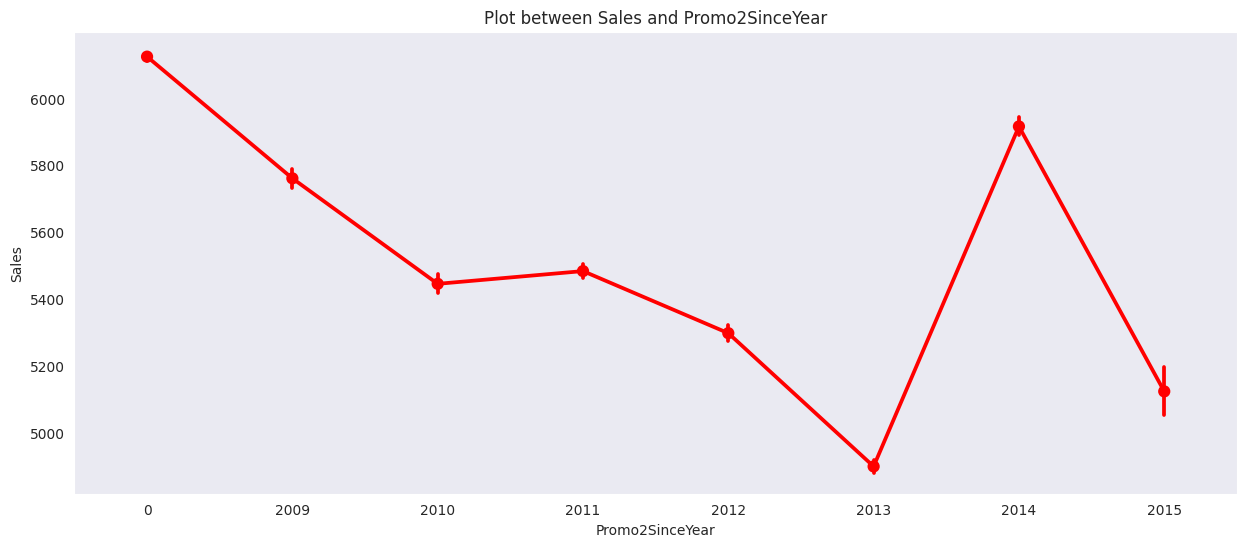

In [41]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'Promo2SinceYear', y = 'Sales', data=finall,color = 'red')
sns.set_style("dark")
plt.title('Plot between Sales and Promo2SinceYear')

From This graph we saw that sales of stores is effected which continues their  promotion. The Sales in 2013 and 2015 are are very low inspite of promotion. The reason can be more competition year by year.

#<B> BOX PLOT<B/>

Text(0.5, 1.0, 'Boxplot For Sales Values')

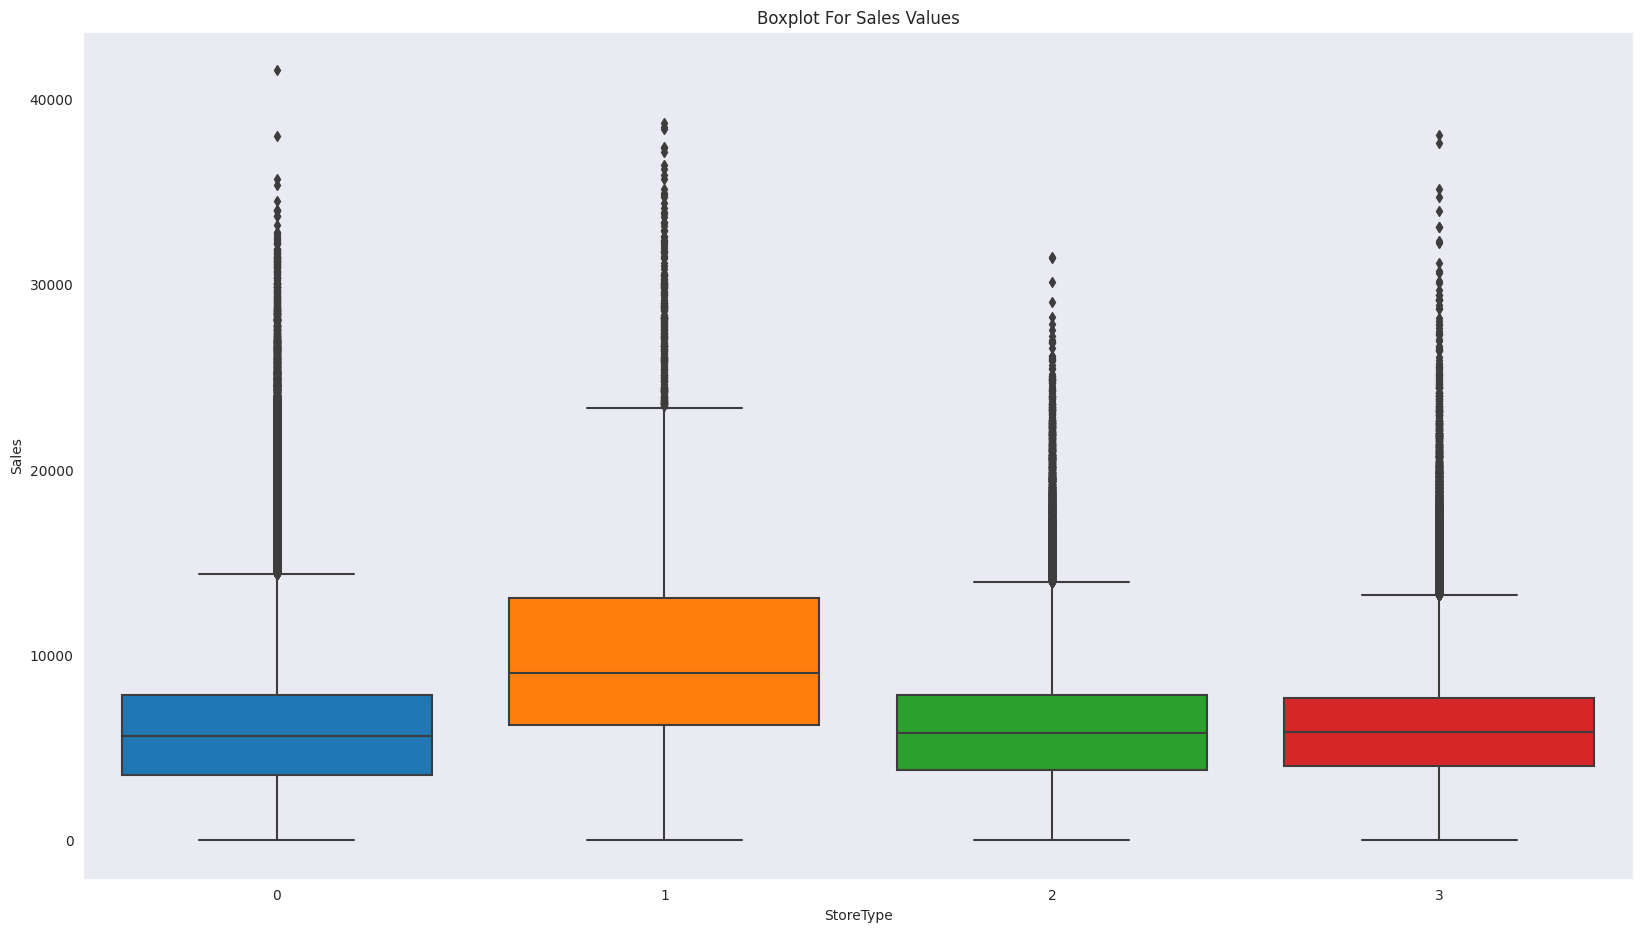

In [42]:
plt.figure(figsize=(20, 11))
plot_storetype_sales = sns.boxplot(x = "StoreType", y = "Sales", data= finall, saturation=1.5, width = 0.8)
plt.title('Boxplot For Sales Values')

Text(0.5, 1.0, 'Boxplot For Sales Values on the basic of Assortment')

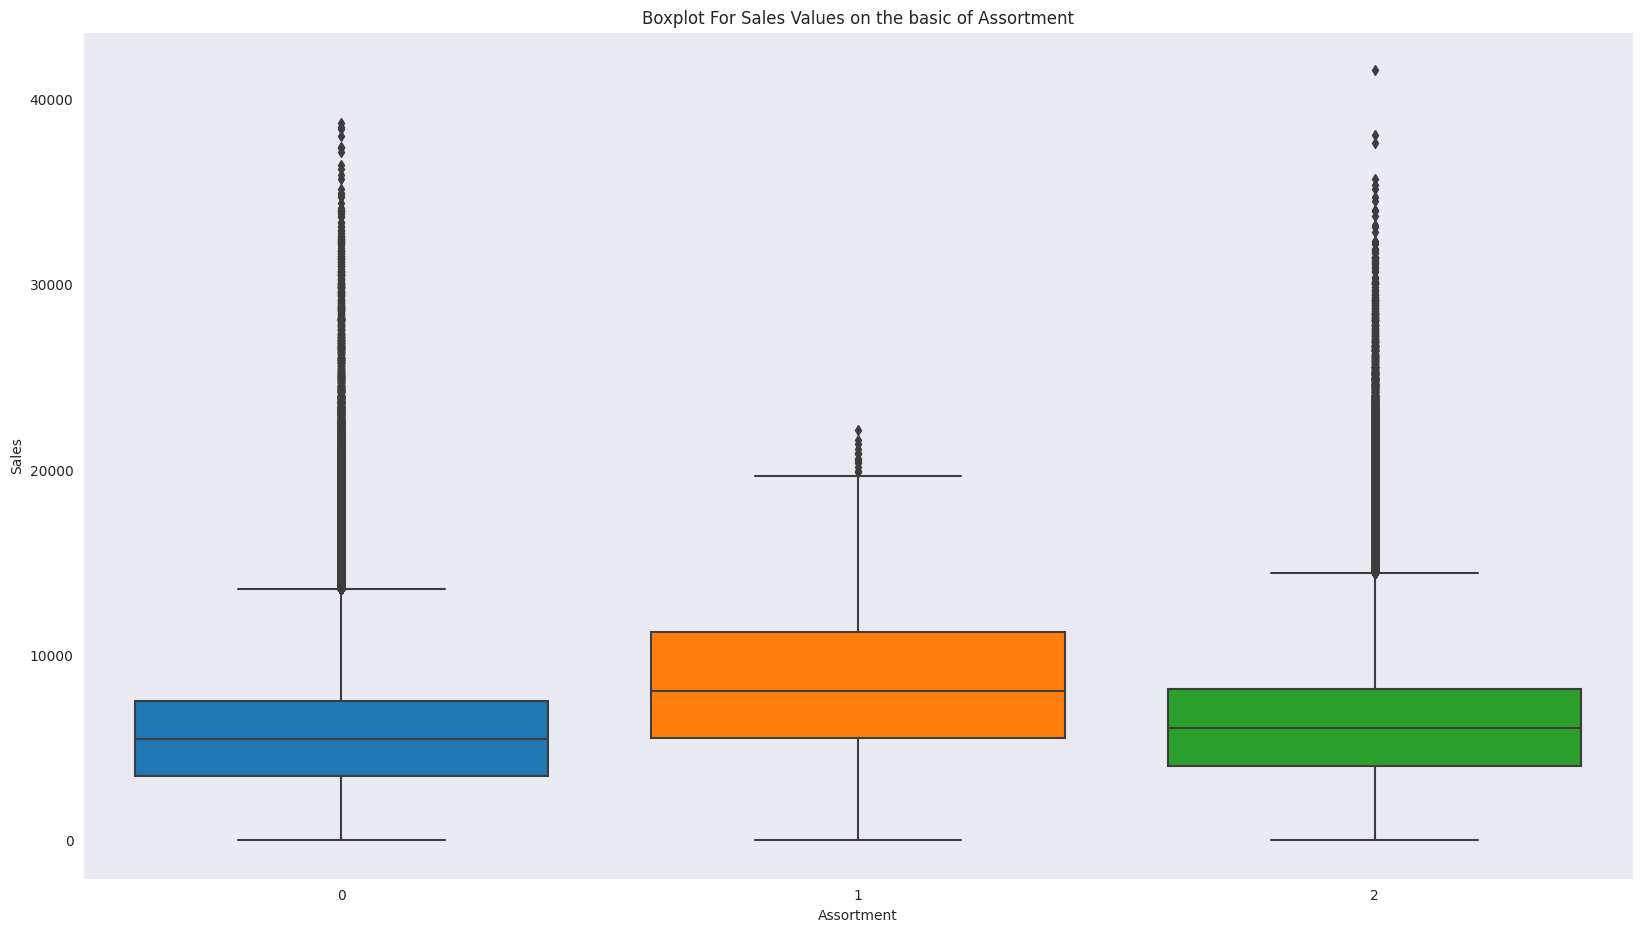

In [43]:
plt.figure(figsize=(20, 11))
plot_storetype_sales = sns.boxplot(x = "Assortment", y = "Sales", data= finall, saturation=1.5, width = 0.8)
plt.title('Boxplot For Sales Values on the basic of Assortment')

Text(0.5, 1.0, 'Store Daily Open Countplot')

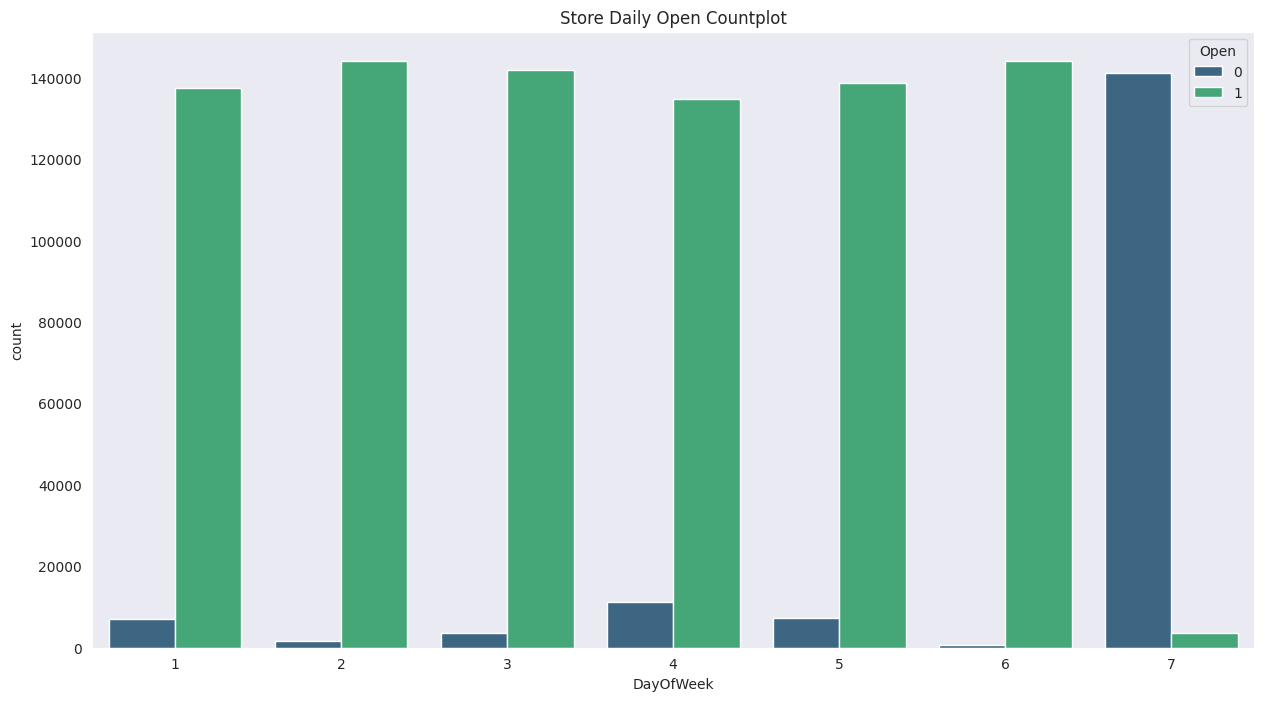

In [44]:
plt.figure(figsize=(15, 8))
sns.countplot(x = "DayOfWeek", hue = "Open", data= finall, palette = 'viridis')
plt.title('Store Daily Open Countplot')

Text(0.5, 1.0, 'Store Daily Promo Countplot')

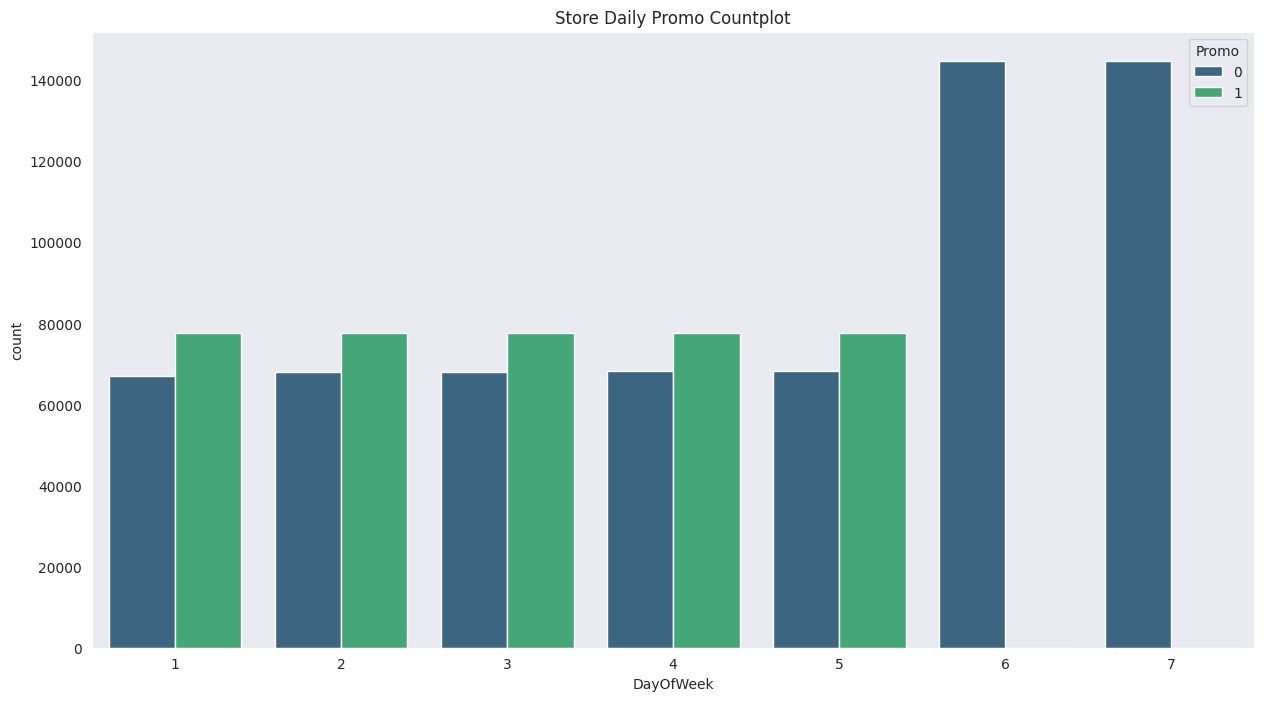

In [45]:
plt.figure(figsize=(15, 8))
sns.countplot(x = "DayOfWeek", hue = "Promo", data= finall, palette = 'viridis')
plt.title('Store Daily Promo Countplot')

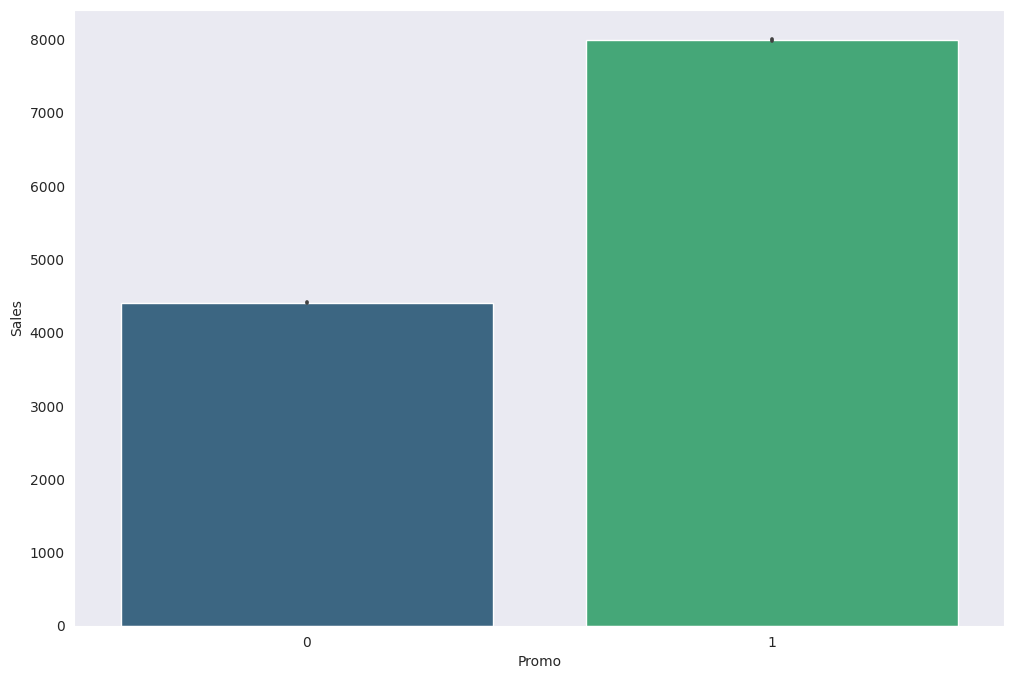

In [46]:
plt.figure(figsize=(12, 8))
Promo_sales = sns.barplot(x = "Promo", y= "Sales", data= finall, palette = 'viridis')


Here 0 representations the store which didnt opt for promotion and 1 represents for stores who opt for promotion. Those store who took promotions their sales are high as compared to stores who didnt took promotion.

<b> State Holiday</b>

0 = public holiday, 1 = Easter holiday, 2= Christmas, 3 = None

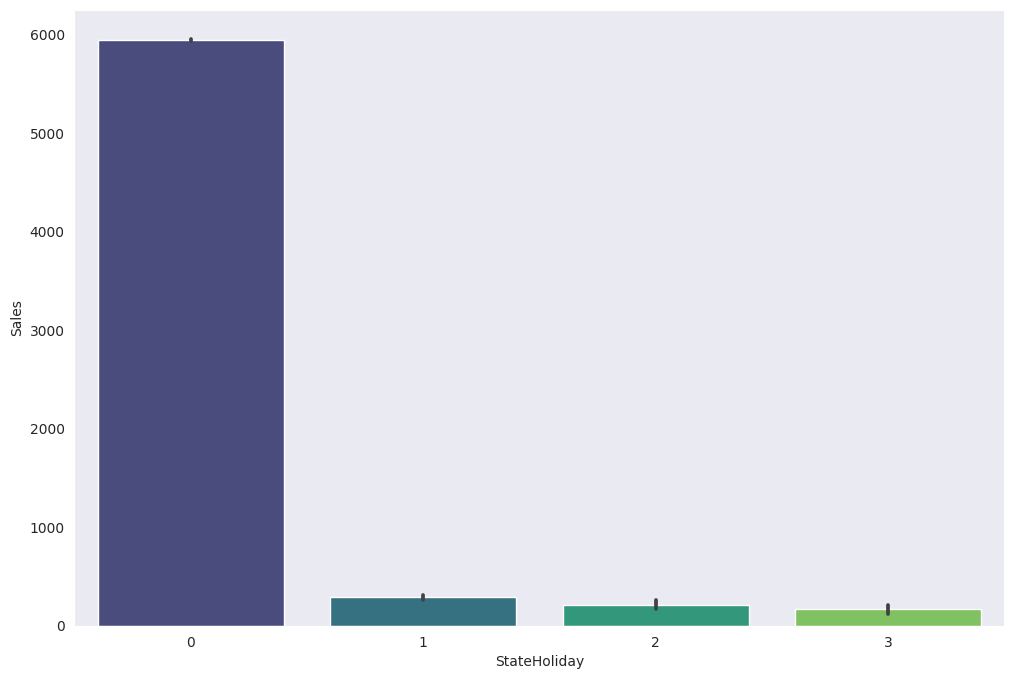

In [47]:
plt.figure(figsize=(12, 8))
stateholiday_sales = sns.barplot(x = "StateHoliday", y= "Sales", data= finall, palette = 'viridis')

#<b>School Holiday</b>

0 = 'Not Holiday', 1= 'Holiday'

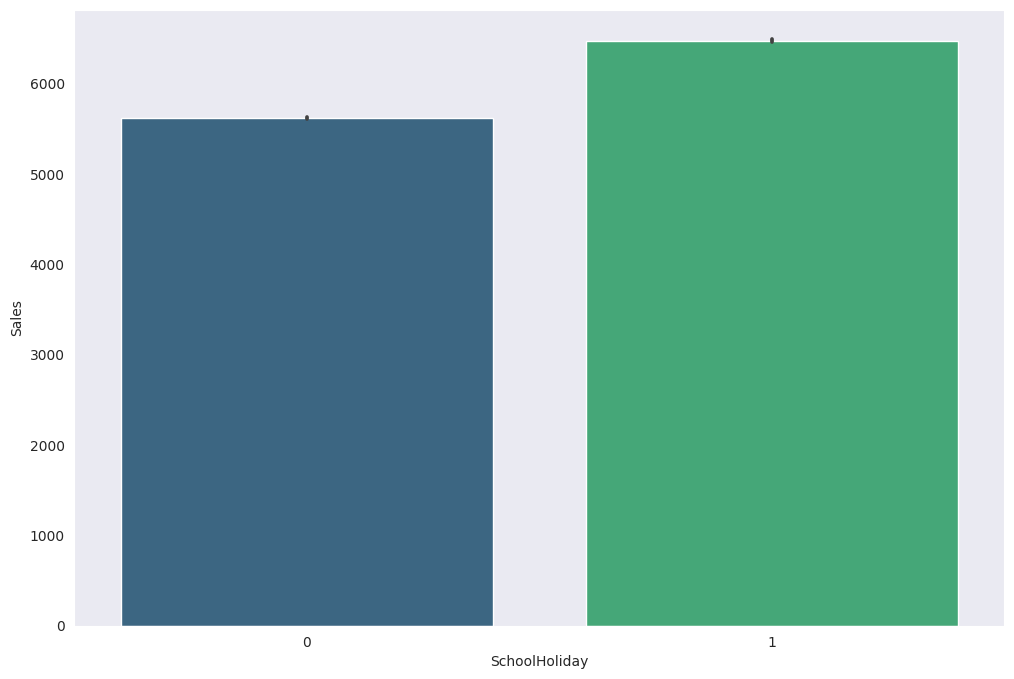

In [48]:
plt.figure(figsize=(12, 8))
stateholiday_sales = sns.barplot(x = "SchoolHoliday", y= "Sales", data= finall, palette = 'viridis')

We can obseve that most of the stores remain closed during State and Holidays. but it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays. Another important thing to note is that the stores which were opened during School holidays had more sales than normal.

<b>Conclusion of EDA</B>

1) From plot sales and competition Open Since Month shows sales go increasing from November and highest in month December.

2)From plot Sales and day of week, sales highest on Monday and start declining from Tuesday to Saturday and on Sunday Sales almost near to Zero.

3)Plot between Promotion and Sales shows that Promotion helps in increasing Sales.

4) Type of Store plays an important role in opening pattern of stores.

5)All Type 'b' stores never closed except for refurbishment or other reason.

6)All Type 'b' stores have comparatively higher sales and mostly constant with peaks on weekends.

7)ssortment Level 'b' is only offered at Store Type 'b'.

8)We can observe that most of the stores remain closed during State Holidays. But it is interesting ot note that the number of stores opened during School Holidays were more than that were opened during State Holidays.

<b>Feature Eingineering & Data Pre-Processing</b>

<ipython-input-49-60f150b825ce>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = finall.corr()


<Axes: >

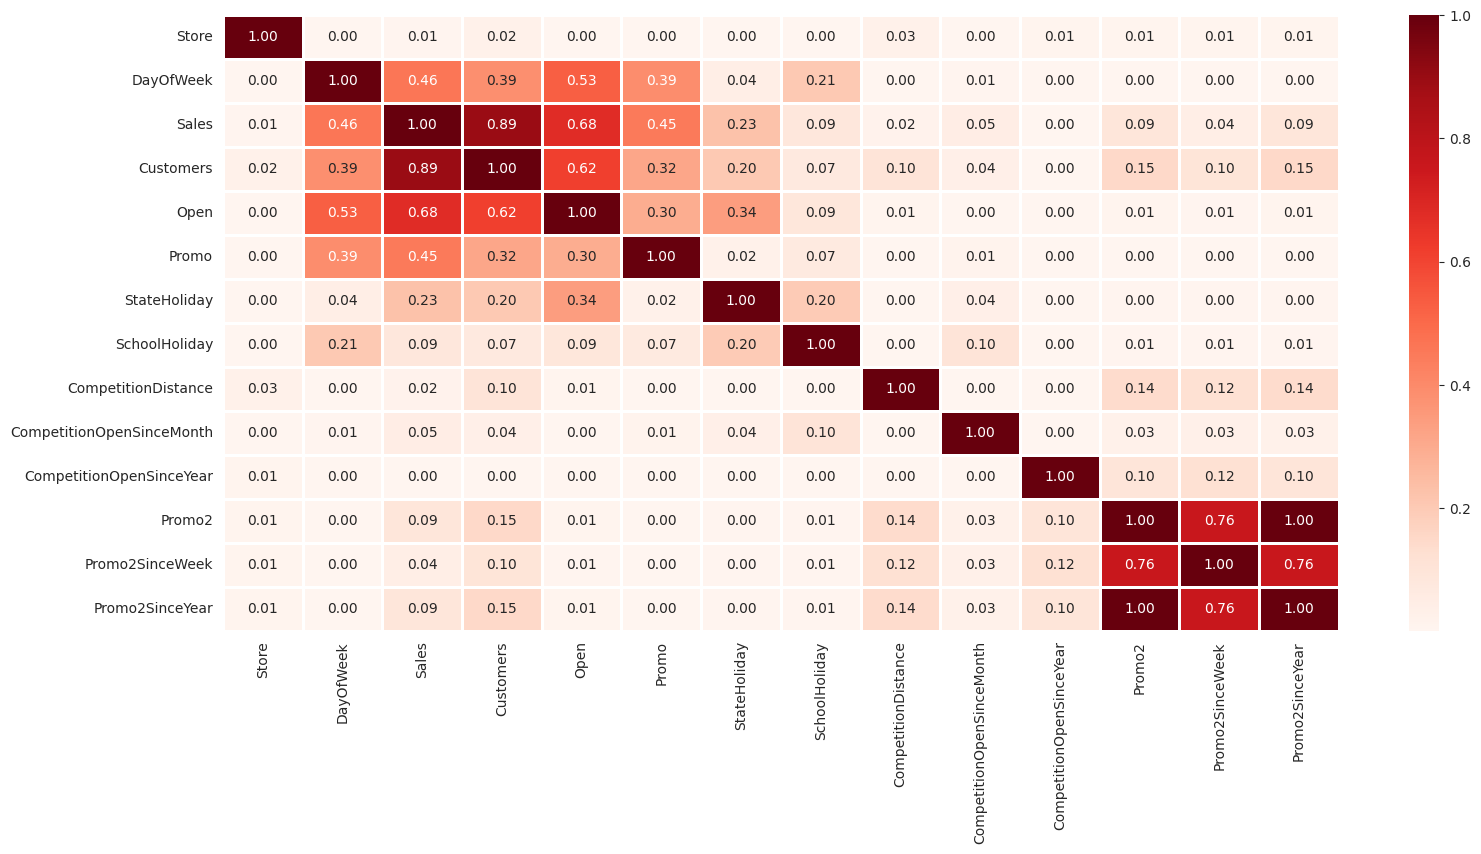

In [49]:
plt.figure(figsize=(18, 8))
correlation = finall.corr()
sns.heatmap(abs(correlation), annot = True, cmap = 'Reds', linewidths=2, fmt=".2f")

The color of the cell indicates the direction and stength of the correlation: a positive correlation is indicated by a warm color (such as Red) and a negative correlation is indicated by a cool color (such as Orange).The intensity of the color represents the strength of the correlation.

<b> Multicollinearity</b>

Multicollinearity is a statiscal term that refers to the situation where two or more predictor variables in a regression model are highly correlated with each other.

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

  # calculationg VIF
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)


In [51]:
calc_vif(finall[[ i for i in finall.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,3.686894e+00
1,DayOfWeek,3.937664e+00
2,Customers,5.096225e+00
3,Open,9.013722e+00
4,Promo,1.910332e+00
5,StateHoliday,1.183161e+00
6,SchoolHoliday,1.330541e+00
7,CompetitionDistance,1.537088e+00
8,CompetitionOpenSinceMonth,3.834283e+00
9,CompetitionOpenSinceYear,2.971004e+00


In above table we can see that VIF (Variance Inflation Fcator) value for column Promo2 and Promo2SinceYear is Higher. So we will drop either Promo or Promo2SinceYear and again check VIF value.Here we drop Promo2 column.

In [52]:
calc_vif(finall[[ i for i in finall.describe().columns if i not in ['Sales','Promo2']]])

,variables,VIF
0,Store,3.684228
1,DayOfWeek,3.937362
2,Customers,5.094044
3,Open,9.011037
4,Promo,1.910250
5,StateHoliday,1.183161
6,SchoolHoliday,1.330521
7,CompetitionDistance,1.531563
8,CompetitionOpenSinceMonth,3.833519
9,CompetitionOpenSinceYear,2.966035


<b>VIF factor below 10 is look good for Machine Learing Model</b>.

#**Analysis of Target Variable i.e 'Sales'**.

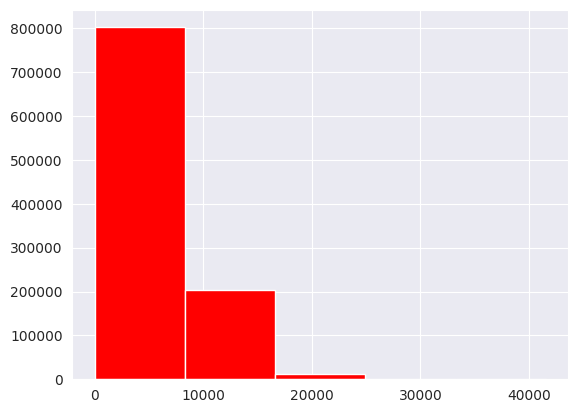

In [53]:
pd.Series(finall['Sales'],).hist(bins=5, color="red")
plt.show()

In [54]:
finall[(finall.Open == 0) & (finall.Sales==0)].count()[0]

172817

So we will drop thoose store which sales is 0 assuming that the stores were closed temoprarily and this will help to train the model more accurately.

In [55]:
new_df = finall.drop(finall[(finall.Open == 0) & (finall.Sales == 0)].index)

In [56]:
new_df.shape

(844392, 18)

In [57]:
new_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,1,1,1,0,150,1,2006,0,0,0,0
1016827,733,2,2013-01-01,10765,2377,1,0,1,1,1,1,860,1,1999,0,0,0,0
1016863,769,2,2013-01-01,5035,1248,1,0,1,1,1,1,840,1,0,1,48,2012,"Jan,Apr,Jul,Oct"
1017042,948,2,2013-01-01,4491,1039,1,0,1,1,1,1,1430,1,0,0,0,0,0


In new_df dataset, column name 'Promointerval' change into dummies ti means that each new column will have a binary value(0 or 1).



In [58]:
new_df = pd.get_dummies(new_df,columns=['PromoInterval'])

In [59]:
new_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,1,1,1,...,150,1,2006,0,0,0,1,0,0,0
1016827,733,2,2013-01-01,10765,2377,1,0,1,1,1,...,860,1,1999,0,0,0,1,0,0,0
1016863,769,2,2013-01-01,5035,1248,1,0,1,1,1,...,840,1,0,1,48,2012,0,0,1,0
1017042,948,2,2013-01-01,4491,1039,1,0,1,1,1,...,1430,1,0,0,0,0,1,0,0,0


In [60]:
new_df.to_csv('cleandata.csv', index=False)


In [61]:
finall.to_csv('cleandata1.csv',index=False)

In [62]:
# defining dependent variable
dependent_variables = 'Sales'

# defining independent variable
independent_variables = list(new_df.columns.drop(['Promo2SinceYear','Date','Sales']))

In [63]:
#List of Independent Variable 
independent_variables


['Store',
 'DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'PromoInterval_0',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec']

In [64]:
# Create the data of independent variables
X = new_df[independent_variables].values

# Create the data of dependent variable
y = new_df[dependent_variables].values


In [65]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(675513, 18)
(168879, 18)


<B>5-Hypothesis Testing<b>

Hypothetical Statement -1 

#**( excluding rows which has sales = 0)**

Hypothetical Statement-2 

#**By taking whole Dataset**

In finall dataset, column name 'Promointerval' change into dummies ti means that each new column will have a binary value(0 or 1).

 

In [66]:
finall = pd.get_dummies(finall,columns=['PromoInterval'])

In [67]:
finall.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0


We define dependent and independent variables and convert them into arrays

In [68]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = finall.columns.drop(['Store', 'Promo2SinceYear', 'Date', 'Sales'])

In [69]:
indep_var

Index(['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'PromoInterval_0', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [70]:
# Create the data of independent variables 
U = finall[indep_var].values
# Create the dependent variable data
V = finall [dep_var].values

In [71]:
V

array([5263, 6064, 8314, ...,    0,    0,    0])

In [72]:
U

array([[5, 555, 1, ..., 0, 0, 0],
       [5, 625, 1, ..., 0, 1, 0],
       [5, 821, 1, ..., 0, 1, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 1]], dtype=object)

In [73]:
finall[indep_var]

,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,5,555,1,1,0,1,2,0,1270,7,2008,0,0,1,0,0,0
1,5,625,1,1,0,1,0,0,570,7,2007,1,13,0,0,1,0
2,5,821,1,1,0,1,0,0,14130,7,2006,1,14,0,0,1,0
3,5,1498,1,1,0,1,2,2,620,7,2009,0,0,1,0,0,0
4,5,559,1,1,0,1,0,0,29910,7,2015,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,2,0,0,0,1,1,0,0,1900,1,2014,1,31,0,0,1,0
1017205,2,0,0,0,1,1,2,2,1880,1,2006,0,0,1,0,0,0
1017206,2,0,0,0,1,1,0,2,9260,1,0,0,0,1,0,0,0
1017207,2,0,0,0,1,1,0,2,870,1,0,0,0,1,0,0,0


In [74]:
# splitting the dataset
U_train, U_test, v_train, v_test = train_test_split(U, V, test_size=0.2, random_state= 0)
print(U_train.shape)
print(U_test.shape)

(813767, 17)
(203442, 17)


In [75]:
sales_mean=finall[dependent_variables].mean()


In [76]:
sales_mean

5773.818972305593

#**LINEAR REGRESSION**

In [77]:
# scaaling the x values
scaler = StandardScaler()

U_train = scaler.fit_transform(U_train)
U_test = scaler.transform(U_test)

In [78]:
# fitting the data into- Lineat Regreassion Model
linear_regression = LinearRegression()
linear_regression.fit(U_train, v_train)

LinearRegression()

In [79]:
v_pred = linear_regression.predict(U_test)
v_pred

array([ 7101.66614705, 12611.33802205,  9204.59583455, ...,
        6938.9200533 ,  5999.9747408 ,  4007.9825533 ])

In [80]:
linear_regression.score(U_train, v_train)

0.8677978490444807

In [81]:
regression_Dataframe = pd.DataFrame(zip(v_test, v_pred), columns = ['actual','pred'])
regression_Dataframe

,actual,pred
0,7285,7101.666147
1,6221,12611.338022
2,8132,9204.595835
3,20916,11526.502085
4,5472,6593.181772
...,...,...
203437,5650,6655.935678
203438,5464,6520.869272
203439,6191,6938.920053
203440,5663,5999.974741


In [82]:

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(v_test, v_pred)
print("MSE :" , MSE )

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE )

RMPSE = RMSE/sales_mean
print("RMPSE :", RMPSE)

r2 = r2_score(v_test, v_pred)
print("R2 :", r2)



MSE : 1944268.5102740775
RMSE : 1394.370291663616
RMPSE : 0.24149878933714092
R2 : 0.8684236859866605


# **DECISION TREE**

In [83]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(U_train, v_train)
v_pred_dt = decision_tree.predict(U_test)
v_train_dt = decision_tree.predict(U_train)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(v_test, v_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_dt)
print("R2 :" ,r2)

MSE : 1938797.0529188653
RMSE : 1392.4069279197317
RMPSE : 0.24115874338951052
R2 : 0.8687939610732938


In [84]:
decisiontree_Dataframe = pd.DataFrame(zip(v_test, v_pred), columns = ['actual', 'pred'])
decisiontree_Dataframe


,actual,pred
0,7285,7101.666147
1,6221,12611.338022
2,8132,9204.595835
3,20916,11526.502085
4,5472,6593.181772
...,...,...
203437,5650,6655.935678
203438,5464,6520.869272
203439,6191,6938.920053
203440,5663,5999.974741


In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create a random forest regressor with n_estimators=500, max_depth=8, and n_jobs=2
random_forest = RandomForestRegressor(n_estimators=500, max_depth=8, n_jobs=2)

# Fit the random forest to the training data
random_forest.fit(U_train, v_train)

# Make predictions on the test data
v_pred_rf = random_forest.predict(U_test)

# Calculate the mean squared error (MSE) between the predicted and actual values
MSE = mean_squared_error(v_test, v_pred_rf)
print("MSE:", MSE)

# Calculate the root mean squared error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

# Calculate the root mean squared percentage error (RMPSE)
sales_mean = np.mean(v_test)
RMPSE = RMSE / sales_mean
print("RMPSE:", RMPSE)

# Calculate the coefficient of determination (R2 score)
r2 = r2_score(v_test, v_pred_rf)
print("R2:", r2)

MSE: 1119712.514040829
RMSE: 1058.1646913599172
RMPSE: 0.18311706177500986
R2: 0.924224640488914


In [86]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(n_estimators=500, learning_rate=0.01)
adaboost.fit(U_train, v_train)
v_pred_ada = adaboost.predict(U_test)

MSE = mean_squared_error(v_test, v_pred_ada)
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

RMPSE = RMSE/sales_mean
print("RMPSE :", RMPSE)

r2 = r2_score(v_test, v_pred_ada)
print("R2 :", r2)

MSE : 2299156.0008105654
RMSE : 1516.2968049859385
RMPSE : 0.26239754357237266
R2 : 0.8444070506055461


In [87]:
import xgboost as xgb

xgboost = xgb.XGBRegressor(n_estimators=500, max_depth=8, n_jobs=2)
xgboost.fit(U_train, v_train)
v_pred_xgb = xgboost.predict(U_test)

MSE = mean_squared_error(v_test, v_pred_xgb)
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

RMPSE = RMSE/sales_mean
print("RMPSE :", RMPSE)

r2 = r2_score(v_test, v_pred_xgb)
print("R2 :", r2)


MSE : 177545.44218920538
RMSE : 421.3614151642333
RMPSE : 0.07291725467712691
R2 : 0.9879848000779321


In [88]:
finall

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1,0,...,1900,1,2014,1,31,2013,0,0,1,0
1017205,1112,2,2013-01-01,0,0,0,0,1,1,2,...,1880,1,2006,0,0,0,1,0,0,0
1017206,1113,2,2013-01-01,0,0,0,0,1,1,0,...,9260,1,0,0,0,0,1,0,0,0
1017207,1114,2,2013-01-01,0,0,0,0,1,1,0,...,870,1,0,0,0,0,1,0,0,0


In [89]:
import pickle
pickle.dump(finall,open('final1.pkl','wb'))
pickle.dump(xgboost,open('xgboost.pkl','wb'))


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

We saw that Sales column contains 172817 rows with 0 sale. So we created a   new dataframe in which we removed 0 sales rows and tried to train our model. We used various algorithms and got accuracy score around **74%.**



We were also curious about the total dataset(including Sales = 0 rows). So we trained another model using various algorithms and we got accuracy near about **98%** which is far better than previous model.




So we came to conclusion that removing sales=0 rows actually removes lot of information from dataset as it has **172817**   rows which is quite large and therefore we decided not to remove those values.We got our best rmpse score from **Random Forest model,Graident boosting technique like  adaboost ,Xgboost**,we tried taking an optimum parameter so that our model doesnt overfit.

### ***Hurrah! We have successfully completed Our Machine Learning Capstone Project !!!***